**HOUSE PRICE PREDICTION**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [97]:
housing_data = pd.read_csv('../datasets/Chapter 2 - housing.csv')

housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis

**Explore the data**

In [98]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Plot values of ocean_proximity

<AxesSubplot:>

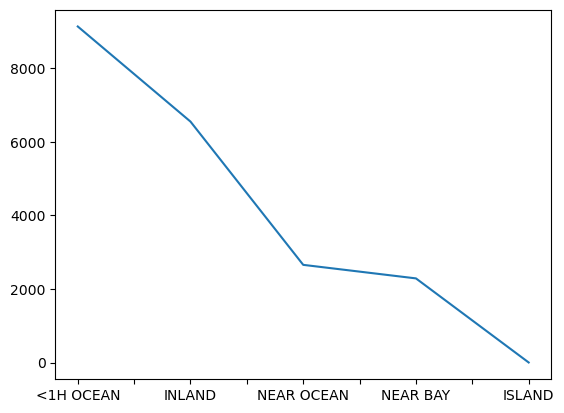

In [99]:
housing_data['ocean_proximity'].value_counts().plot()

In [100]:
housing_data['count'] = 1

In [101]:
df = housing_data.groupby(['ocean_proximity']).sum().reset_index().sort_values(['count'] , ascending = False)

df

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,count
0,<1H OCEAN,-1085793.19,315745.43,267495.0,24012547.0,4937435.0,13889374.0,4730118.0,38651.5100,2.193410e+09,9136
1,INLAND,-784370.82,240630.21,159005.0,17803933.0,3468095.0,9112744.0,3127759.0,21022.1353,8.176001e+08,6551
4,NEAR OCEAN,-317185.93,92334.77,78005.0,6867477.0,1415482.0,3598955.0,1332308.0,10647.3760,6.629955e+08,2658
3,NEAR BAY,-279976.99,86564.42,86402.0,5710320.0,1167195.0,2817427.0,1118931.0,9555.9061,5.935962e+08,2290
2,ISLAND,-591.77,166.79,212.0,7873.0,2102.0,3340.0,1383.0,13.7221,1.902200e+06,5


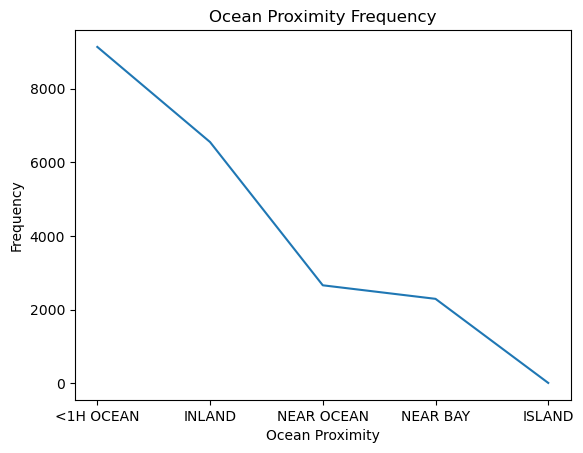

In [102]:
plt.plot(df['ocean_proximity'] , df['count'])
plt.ylabel('Frequency')
plt.xlabel('Ocean Proximity')
plt.title('Ocean Proximity Frequency')
plt.show()

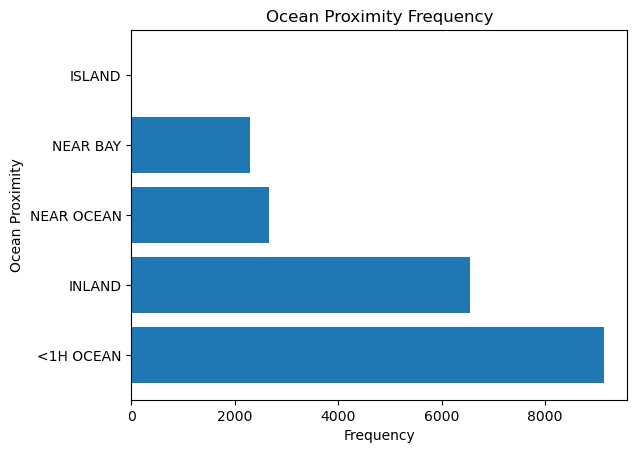

In [103]:
plt.barh(df['ocean_proximity'] , df['count'])
plt.xlabel('Frequency')
plt.ylabel('Ocean Proximity')
plt.title('Ocean Proximity Frequency')
plt.show()

In [104]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,count
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.0
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.0
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.0
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.0
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.0
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.0
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.0
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.0


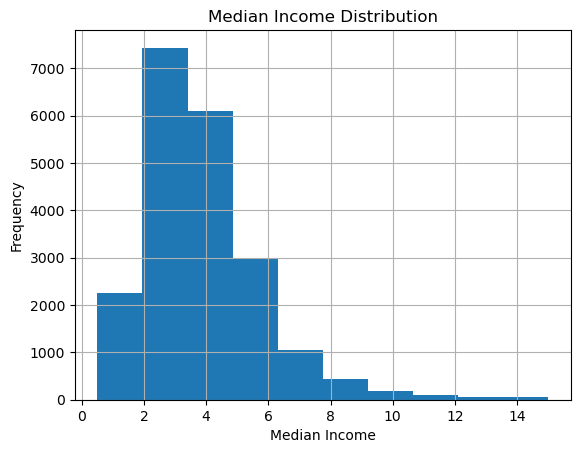

In [105]:
plt.hist(housing_data['median_income'])
plt.grid()
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Median Income Distribution')
plt.show()

**Divide the median_income data into categories**

Bins in this case are 

0-1.5 -> 1

1.5-3 -> 2

3-4.5 -> 3

4.5-6 -> 4

6-infinity -> 5

**cut()** -> Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. 



In [106]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"] , bins = [0. , 1.5 , 3.0 , 4.5 , 6. , np.inf] , labels = [1 , 2 , 3 , 4 , 5])

housing_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

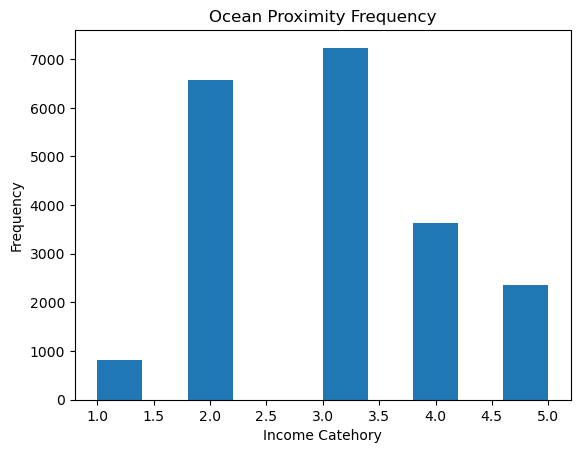

In [107]:
plt.hist(housing_data['income_cat'])
plt.ylabel('Frequency')
plt.xlabel('Income Catehory')
plt.title('Ocean Proximity Frequency')
plt.show()

# Split Dataset

We want to do this before any substantial visualizations that way we can avoid biases inherent to the visualization process

**Seperate dependent and independent features**

In [108]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value" , axis = 1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,count,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,1,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,1,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,1,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,1,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,1,3


In [109]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33)

**Check if distribution of values in train and orignal dataset of income categories are similar**

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

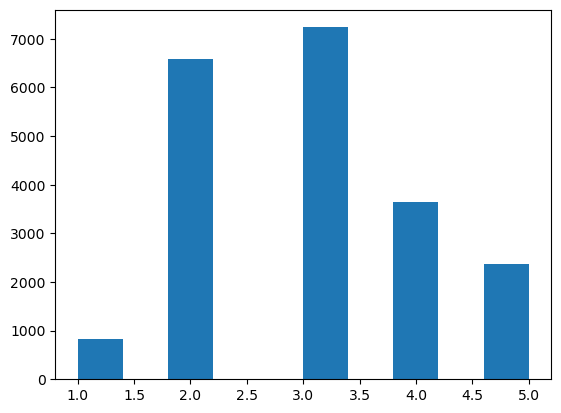

In [110]:
plt.hist(housing_data['income_cat'])

(array([ 538.,    0., 4410.,    0.,    0., 4800.,    0., 2480.,    0.,
        1600.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

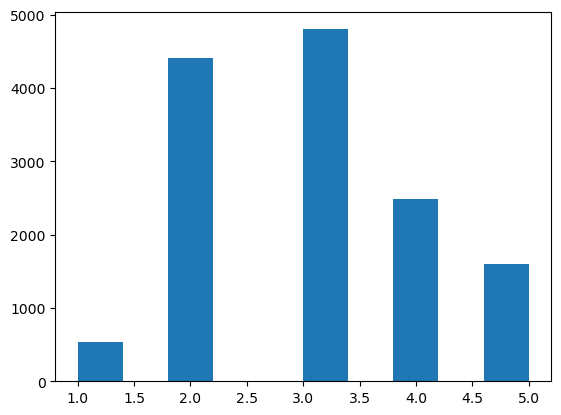

In [111]:
plt.hist(X_train['income_cat'])

(array([ 284.,    0., 2171.,    0.,    0., 2436.,    0., 1159.,    0.,
         762.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

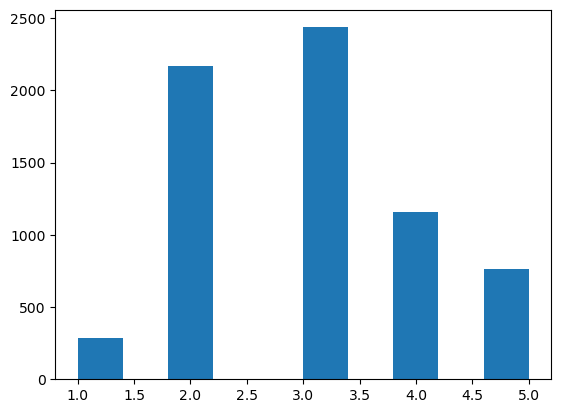

In [112]:
plt.hist(X_test['income_cat'])

## Stratified Splits

Sometimes we might want to split our data in a stratified manner. This means, based on a specific column we will want our train and test sets to have the same approximate distribution. This is especially important with small datasets. Because this dataset is as large as it is we don't have to do this but I feel it's good to see how the code works for something like this. 

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [114]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [115]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

**Notice similar percentage of values in test set and orignal dataset**

In [116]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


**Now no need of income_cat and count version as it may impact train and test and this column wasnt there orignally**

In [117]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

strat_train_set.drop("count", axis="columns", inplace=True)
strat_test_set.drop("count", axis="columns", inplace=True)

# Visualizing our Data

Data visualization is a very important part of any modeling process. Statistics alone can very rarely tell us what we need to know about a dataset. Visualizing data can even reveal obvious patterns that we didn't notice between datasets because all of the measures of central tendancy (mean, median, mode) are the exact same between them. 

In [118]:
housing = strat_train_set.copy()

## Histograms
Histograms are a great way to start off the visualization process. They help us the the distribution of our data


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

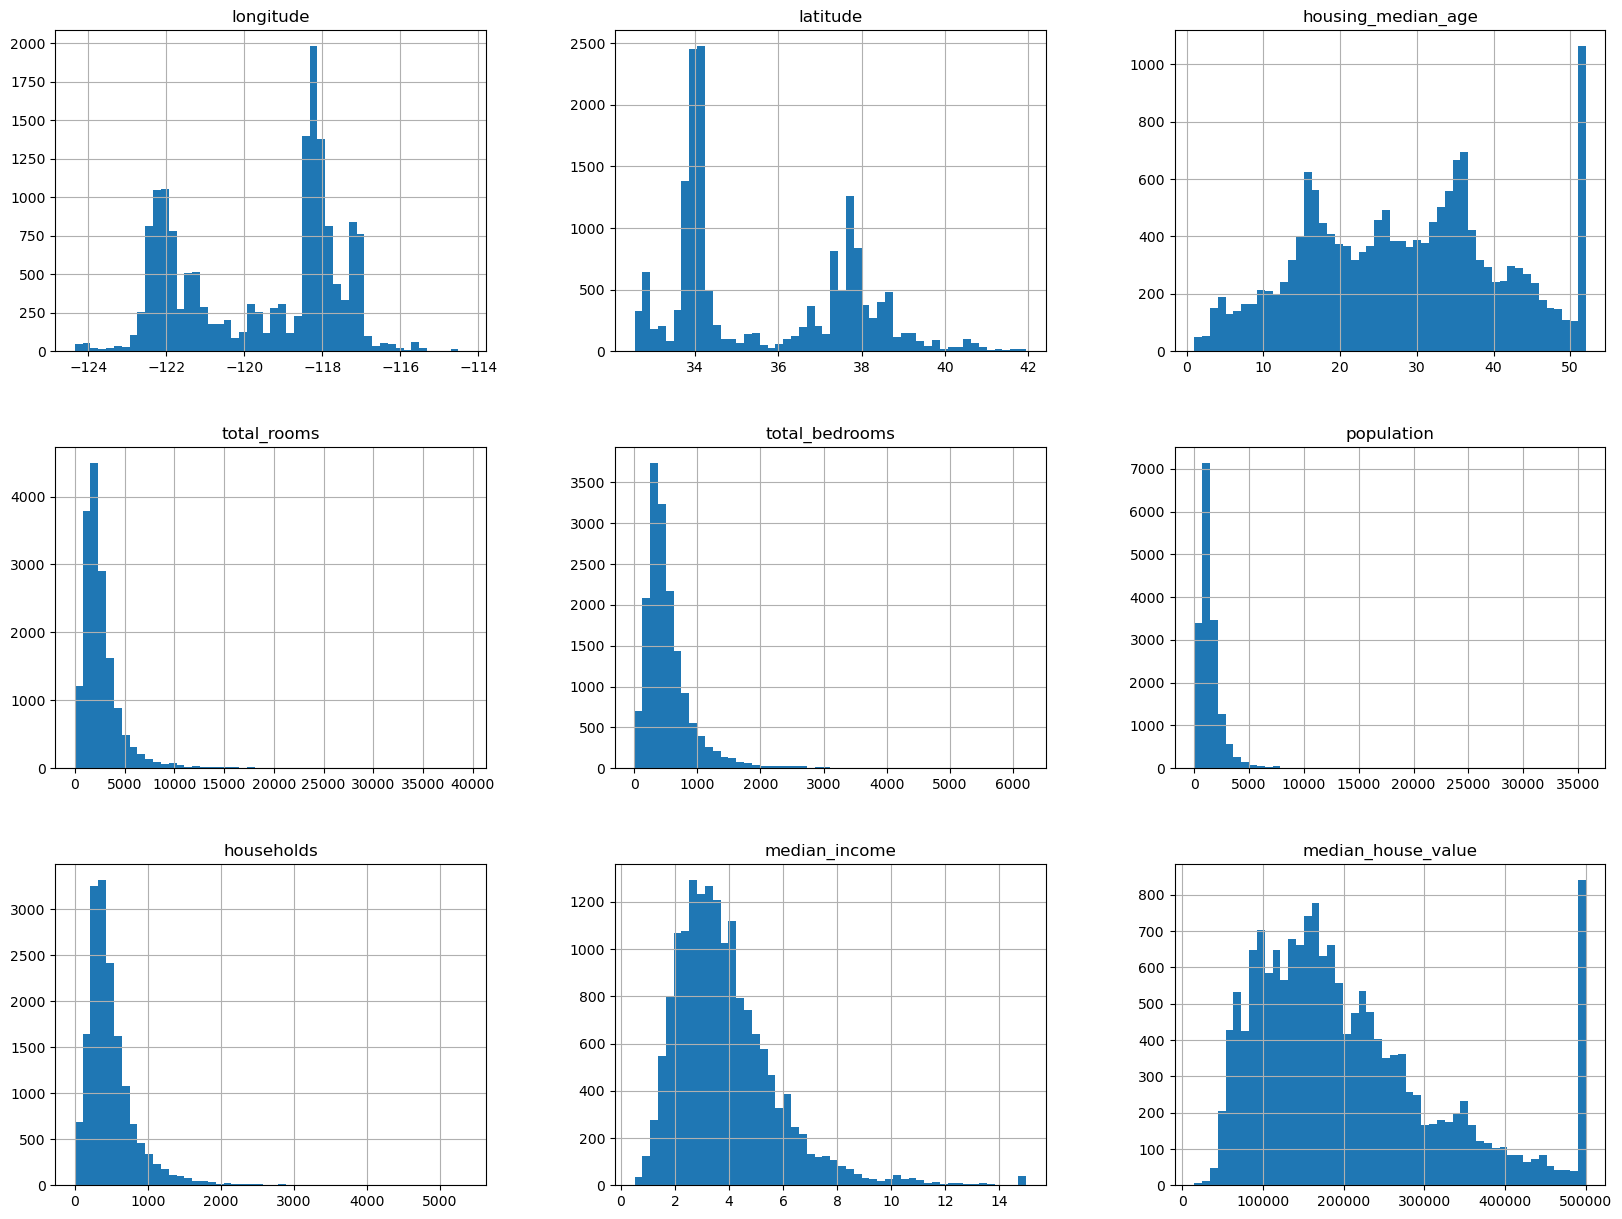

In [119]:
housing.hist(bins=50, figsize=(20, 15))

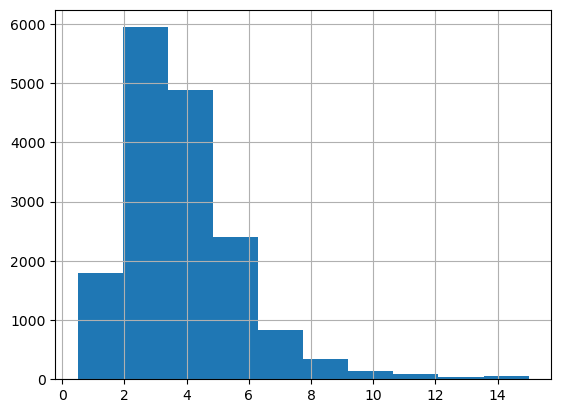

In [120]:
plt.hist(housing['median_income'])
plt.grid()
plt.show()

### Plotting Geographic Data

If you have longitudes and latitudes you should plot them on a map to see what patterns reveal themselves.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

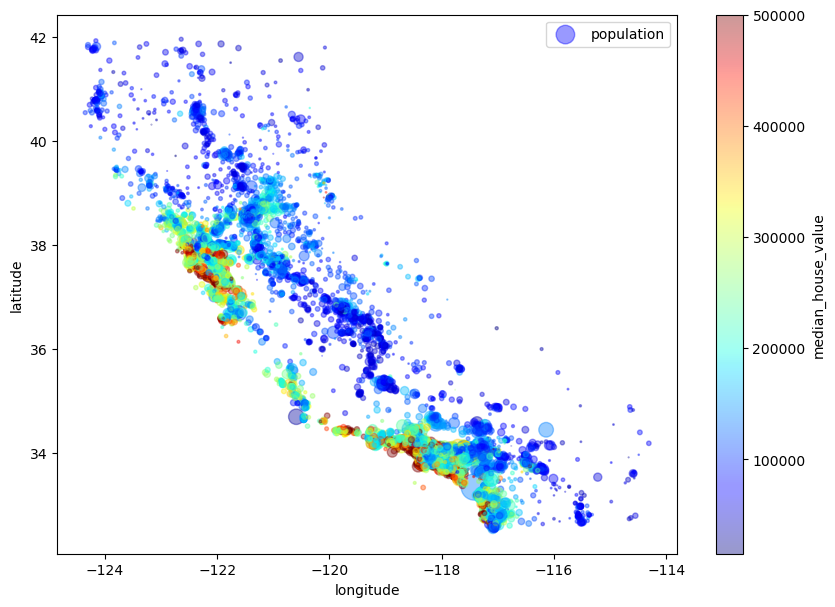

In [121]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

### Correlation Matrices

A correlation matrix is grid that shows the correlation coefficient of every numerical variable against every other numerical variable. It can be a good way to quickly see which variables are of particular interest for your target variable

In [122]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

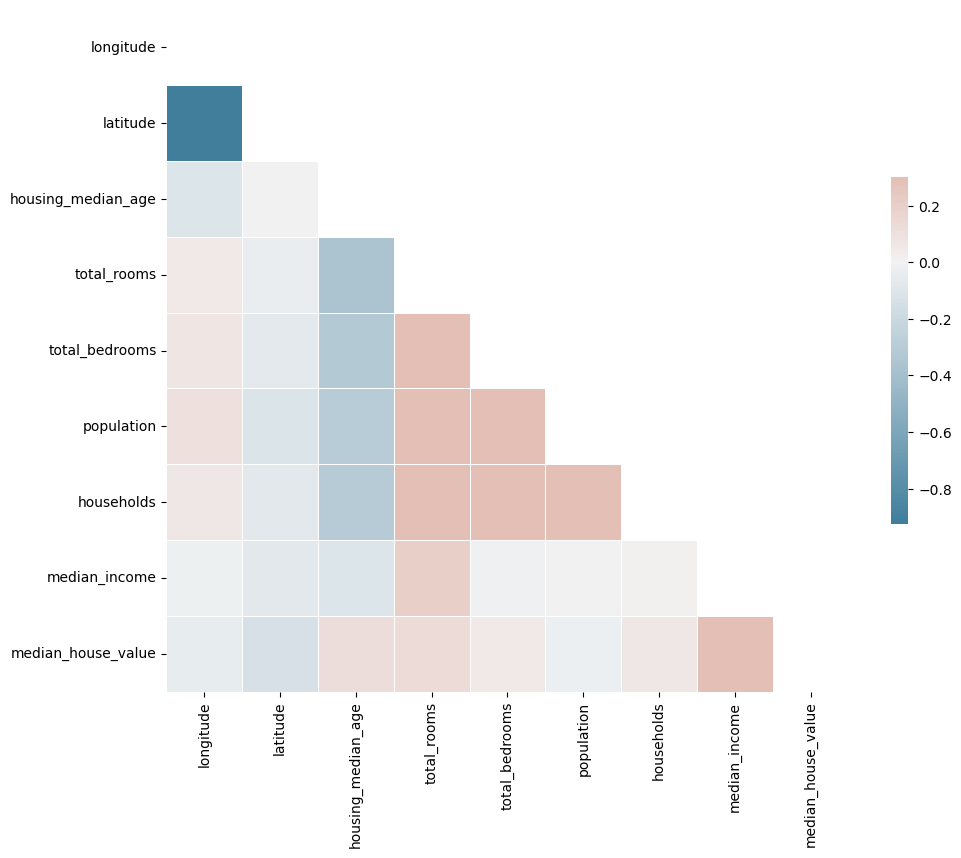

In [123]:
corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preparing Data for Machine Learning

Data preparation is oftentimes the most time-consuming step of the modeling process. It is also one of the most important with model accuracy often contingent on the quality of data inserted. To this end, we'll be applying the following transformations on this data, not in this particular order:

-  **Feature Engineering:** Creating new features (columns) out of our raw data using domain knowledge

- **Imputation:** Inserting values where they might be missing to have a complete dataset

- **Encoding Categorical Variables:** Transforming categorical variables into some numerical variation

- **Scaling:** Applying a scaler that transforms all of our data on the same numerical scale 

In [124]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

### Dealing with missing values

Many machine learning algorithms don't work very well with missing values. Becuase of this we need to learn to deal with them. First let's see if we can find the values that we're interested in.

In [127]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


#### Option 1: Drop the rows with missing values in any columns

In [126]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### Option 2: Drop the columns with missing values

In [128]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN


#### Option 3: Impute (fill in) the values with some replacement value. This can be a completely different value like -999 so the algorithm will learn that the value is missing, or the mean or median or mode of the column

In [129]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

C:\Users\ateet\AppData\Local\Temp\ipykernel_34220\760120979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


In [130]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,NEAR OCEAN


In [131]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Only keep numerical columns

In [132]:
housing_num = housing.select_dtypes(include=[np.number])

In [133]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [134]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [135]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546


### Encoding Categorical Data

In [136]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [137]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [138]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [139]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot# Creates a "dense array" meaning that all instances have a value not just the ones that are encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [140]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Engineering

Feature engineering is the art/science of using domain knowledge to create new features (columns) of data using raw data. This can be key to improving the performance of your Machine Learning models.  

In [141]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [142]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


### Scaling our Data

Many machine learning algorithms don't work well with unscaled data. For example, the magnitude of values in the "total_rooms" feature is going to be substantially higher than that in the "median_income" feature (because the median_income is scaled down by 1000). Because of this we usually will need to scale our values. There are multiple ways to accomplish this, and we will use the StandardScaler which will scale our values to their z-score within their column like so:

z = (x - u) / s

Where x is the value we're scaling, u is the mean of the column, and s is the standard deviation

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

### Concatenating with Categorical Variables

In [144]:
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])

In [145]:
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


### Pipelines

Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another.
Create our own version of a pipeline using a normal Python function.

In [146]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [147]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Select and Train a Model

## Transform our data using the "pipeline" we created 

We now need to create a clean training dataset to "train" our machine learning regressors, and a "test" set to test the accuracy of said regressors. Let's input our stratified samples into our "pipeline"

In [148]:
train_data, train_labels, features= data_transformations(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [149]:
train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [150]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
test_labels

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [152]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

## Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [155]:
# Compare against some Test Data

original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767


In [156]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

78489.8709666808

In [157]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

71328.53325778327

## Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [159]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation

It seems our performance above was top notch. Instead of just splitting our data into a train and test set and training once, we can do something called *K-Fold Cross-Validation* which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.  

In [160]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [161]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70819.83674558 70585.09139446 69861.50467212 73083.46385442
 66246.62162221 74093.76616605 77298.21284135 70265.05374821
 70413.46481703 72693.02785945]
Mean: 71536.00437208822
Standard deviation: 2802.723447985299


In [162]:
lin_scores = cross_val_score(lin_reg, train_data, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71970.62302082 64914.42079347 69359.9804826  68887.54180717
 66988.50031949 72778.86882574 70303.29013317 69196.0211199
 66771.01333718 70565.63793275]
Mean: 69173.58977723011
Standard deviation: 2298.695955693163


## Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [164]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18797.81343373367

In [165]:
# This can take a while depending on how fast your computer is

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,  scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51667.47890087 49581.77674843 46845.77133522 52127.48739086
 48082.89639917 51050.84681689 53027.94987383 50218.59780997
 48609.03966622 54669.97457167]
Mean: 50588.18195131385
Standard deviation: 2273.9929947683154


In [166]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69173.589777
std       2423.038289
min      64914.420793
25%      67463.260691
50%      69278.000801
75%      70500.050983
max      72778.868826
dtype: float64

## Fine-Tuning the Model

After you pick a model or set of models that are promising, you'll need to fine-tune the hyperparameters (parameters of the model that aren't affected by training) in order to find the best ones to use for your model. You can use something called Grid Search in order to accomplish this. 

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [168]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [169]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [170]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64441.33583774864 {'max_features': 2, 'n_estimators': 3}
55010.78729315784 {'max_features': 2, 'n_estimators': 10}
52756.90743676946 {'max_features': 2, 'n_estimators': 30}
60419.95105027927 {'max_features': 4, 'n_estimators': 3}
52548.760723492225 {'max_features': 4, 'n_estimators': 10}
50475.03023921768 {'max_features': 4, 'n_estimators': 30}
58658.87553276854 {'max_features': 6, 'n_estimators': 3}
51688.259845013825 {'max_features': 6, 'n_estimators': 10}
49602.83903888296 {'max_features': 6, 'n_estimators': 30}
57764.545176887186 {'max_features': 8, 'n_estimators': 3}
51906.606161086886 {'max_features': 8, 'n_estimators': 10}
49851.77165193962 {'max_features': 8, 'n_estimators': 30}
63137.43571927858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.40582754731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58195.29390064867 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.74519952844 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [171]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088692,0.010513,0.005000,0.000897,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.094088e+09,-3.701893e+09,...,-4.152686e+09,2.564139e+08,18,-1.120130e+09,-1.095790e+09,-1.132094e+09,-1.176269e+09,-1.121152e+09,-1.129087e+09,2.640853e+07
1,0.347012,0.061278,0.013602,0.001202,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.970210e+09,-2.920099e+09,...,-3.026187e+09,9.517266e+07,11,-5.710653e+08,-5.732697e+08,-5.938710e+08,-5.909882e+08,-5.970375e+08,-5.852464e+08,1.087131e+07
2,0.899781,0.182099,0.032579,0.004578,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.757089e+09,-2.695824e+09,...,-2.783291e+09,9.766273e+07,9,-4.345880e+08,-4.372516e+08,-4.355848e+08,-4.348115e+08,-4.407693e+08,-4.366010e+08,2.284079e+06
3,0.131086,0.009343,0.004839,0.001333,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.739305e+09,-3.453554e+09,...,-3.650570e+09,1.567023e+08,16,-1.033917e+09,-1.025859e+09,-9.509278e+08,-9.789355e+08,-9.988662e+08,-9.977011e+08,3.048182e+07
4,0.395073,0.025321,0.010199,0.000749,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.774614e+09,-2.715229e+09,...,-2.761372e+09,1.177235e+08,8,-5.106846e+08,-5.406298e+08,-5.039097e+08,-5.253607e+08,-5.336332e+08,-5.228436e+08,1.375091e+07
5,1.275015,0.108042,0.041026,0.014174,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.558975e+09,-2.443052e+09,...,-2.547729e+09,1.043837e+08,3,-3.851322e+08,-3.974866e+08,-3.849539e+08,-3.882619e+08,-3.934907e+08,-3.898651e+08,4.905561e+06
6,0.170940,0.027880,0.006001,0.001899,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.590876e+09,-3.341284e+09,...,-3.440864e+09,1.044087e+08,14,-9.127519e+08,-9.396161e+08,-8.570217e+08,-9.053142e+08,-9.165255e+08,-9.062459e+08,2.714946e+07
7,0.649112,0.208629,0.011807,0.001462,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.723446e+09,-2.593712e+09,...,-2.671676e+09,1.309912e+08,4,-4.900412e+08,-5.171047e+08,-4.779660e+08,-4.969112e+08,-5.094824e+08,-4.983011e+08,1.387280e+07
8,1.706871,0.189295,0.033903,0.008145,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.472257e+09,-2.369335e+09,...,-2.460442e+09,9.252659e+07,1,-3.740409e+08,-3.831060e+08,-3.835964e+08,-3.687507e+08,-3.818289e+08,-3.782646e+08,5.880922e+06
9,0.272344,0.032866,0.005592,0.001749,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.344547e+09,-3.154085e+09,...,-3.336743e+09,9.768474e+07,12,-8.541704e+08,-9.124260e+08,-9.442119e+08,-8.793192e+08,-8.832932e+08,-8.946842e+08,3.090299e+07


### Randomized Search

Randomized search allows you to more easily find the hyperparameters that we're interested in because instead of searching through all possible combinations, it randomly picks a couple and tries those out. 

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C741970160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C741D00D90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [173]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48881.00597871309 {'max_features': 7, 'n_estimators': 180}
51634.61963021687 {'max_features': 5, 'n_estimators': 15}
50312.55245794906 {'max_features': 3, 'n_estimators': 72}
50952.54821857023 {'max_features': 5, 'n_estimators': 21}
49063.34454115586 {'max_features': 7, 'n_estimators': 122}
50317.63324666772 {'max_features': 3, 'n_estimators': 75}
50173.504527094505 {'max_features': 3, 'n_estimators': 88}
49248.29804214526 {'max_features': 5, 'n_estimators': 100}
50054.94886918995 {'max_features': 3, 'n_estimators': 150}
64847.94779269648 {'max_features': 5, 'n_estimators': 2}


In [174]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.46978272e-02, 7.69983975e-02, 4.08715796e-02, 1.67325719e-02,
       1.71418340e-02, 1.73518185e-02, 1.56303531e-02, 3.39824215e-01,
       2.30528104e-02, 1.04033701e-01, 8.64983594e-02, 1.29273143e-02,
       1.54663950e-01, 7.22217547e-05, 3.62205279e-03, 5.88099358e-03])

### Feature Importance List

Judging the importance of various features is very important as this allows us to explain to our stakeholders which feature is most important and why which is becomeing more important as more advanced models behave like blackboxes. 

In [175]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.0846978271965227),
 ('latitude', 0.07699839747855737),
 ('housing_median_age', 0.040871579612884096),
 ('total_rooms', 0.016732571900462085),
 ('total_bedrooms', 0.01714183399184058),
 ('population', 0.0173518184721046),
 ('households', 0.015630353131298083),
 ('median_income', 0.3398242154869636),
 ('bedrooms_per_household', 0.023052810363875926),
 ('population_per_household', 0.10403370064780083),
 ('rooms_per_household', 0.08649835942626646),
 ('<1H OCEAN', 0.012927314349565632),
 ('INLAND', 0.15466394981681342),
 ('ISLAND', 7.222175467748088e-05),
 ('NEAR BAY', 0.003622052794433035),
 ('NEAR OCEAN', 0.005880993575933963)]

<BarContainer object of 16 artists>

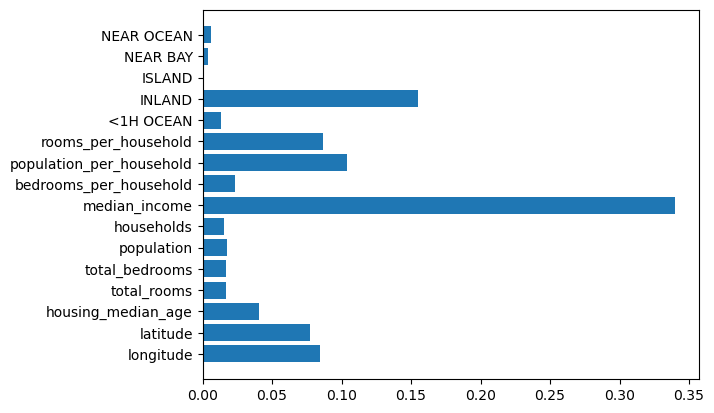

In [176]:
plt.barh(y=features, width=feature_importances.tolist())

In [177]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [178]:
final_rmse

63301.179203602675